In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("salinity.csv")


In [5]:
df.set_index('Date',inplace=True)
df.head()

,Salt
Date,
1871-01-15,33.859350
1871-02-15,33.279476
1871-03-15,33.191720
1871-04-15,33.509857
1871-05-15,33.681843


In [6]:
df.tail()

,Salt
Date,
1953-12-15,33.799267
1954-01-15,33.689900
1954-02-15,33.759155
1954-03-15,33.179096
1954-04-15,33.299020


<Axes: xlabel='Date'>

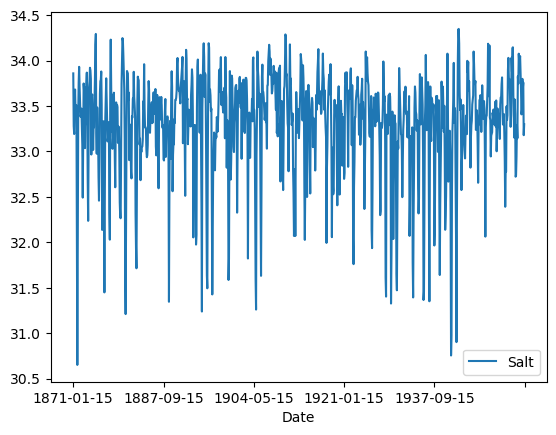

In [7]:
df.plot()

In [8]:
from statsmodels.tsa.stattools import adfuller
#augmented dickey fuller test

In [9]:
test_result=adfuller(df['Salt'])
#H0--> non stationary
#H1--> stationary

In [40]:
def adfuller_test(Salt):
    result=adfuller(df['Salt'])
    labels=['ADF test stats','p-value', '#lags used','no of observations used']
    for value,label in zip(result,labels):
        print(label + ':' + str(value))
    if (result[1]<=0.05):
        print("strong evidence against null hypothesis(H0), reject null hypothesis, Data is stationary")
    else: 
        print("weak evidence against null hypothesis(H0), Data is non stationary")
        

In [42]:
adfuller_test(df['Salt'])

ADF test stats:-4.698763182089474
p-value:8.46041327956953e-05
#lags used:22
no of observations used:977
strong evidence against null hypothesis(H0), reject null hypothesis, Data is stationary


In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

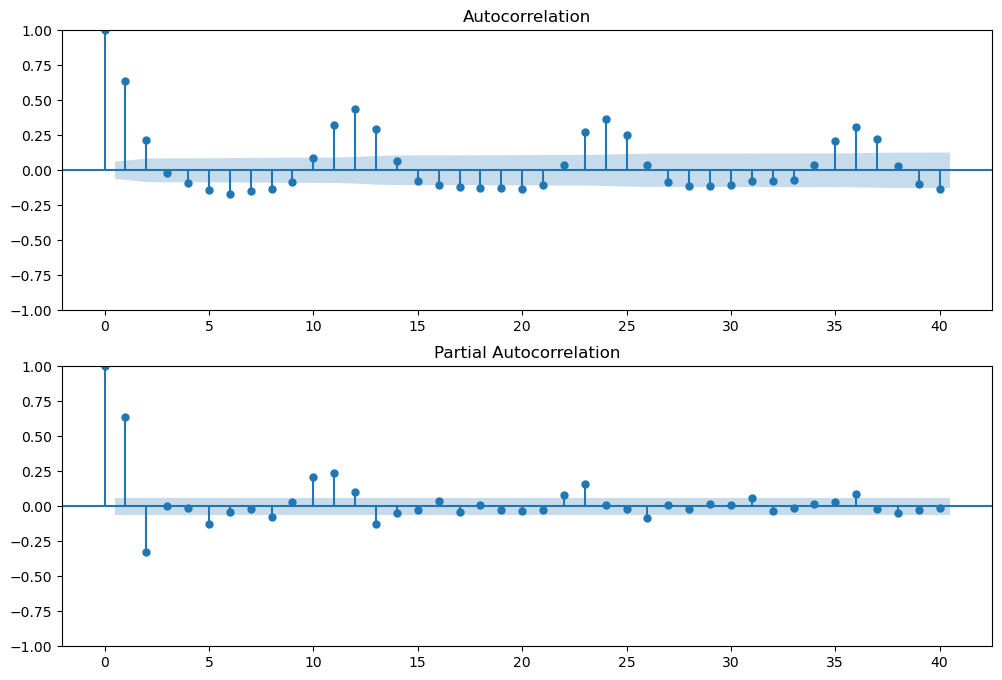

In [13]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(df['Salt'],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(df['Salt'],lags=40,ax=ax2)
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


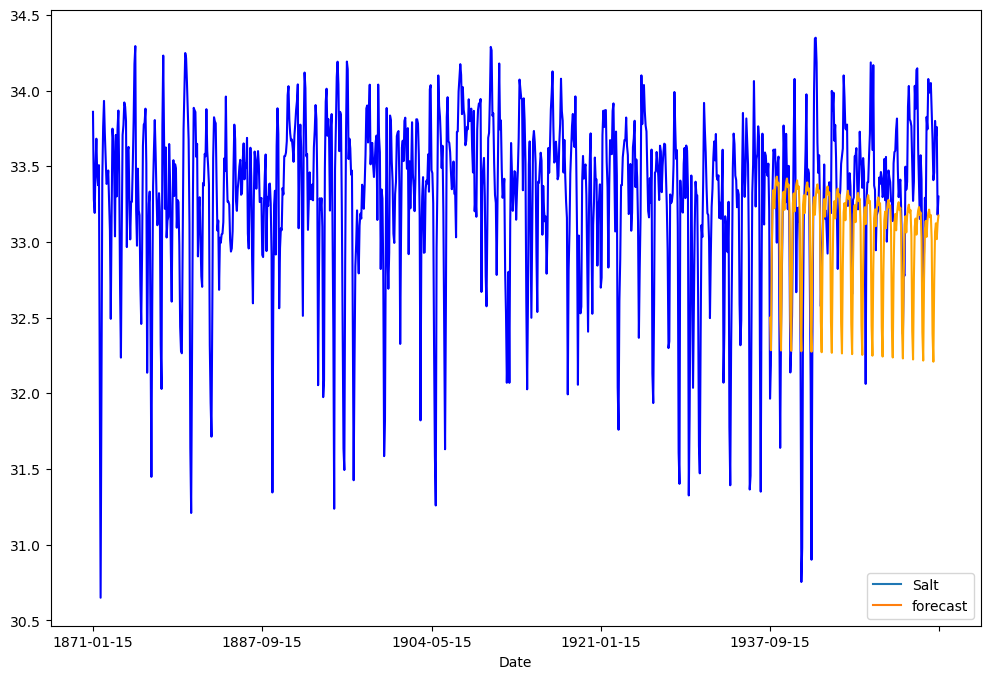

In [14]:
#due to seasonality, we use SARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit your SARIMAX model
model = SARIMAX(df['Salt'], order=(1, 0, 1), seasonal_order=(1,0,1,12))
result = model.fit(disp=False)

# Generate forecast for the last 200 values
start = len(df) - 200
end = len(df) - 1  # Forecasting from the 200th last to the last data point
forecast_values = result.predict(start=start, end=end, dynamic=True)

# Add the forecast values to the DataFrame
df['forecast'] = None  # Initialize the forecast column with NaN
df.iloc[start:end + 1, df.columns.get_loc('forecast')] = forecast_values  # Use .iloc for positional indexing

# Plotting the 'Temp' and 'forecast' columns
ax = df[['Salt', 'forecast']].plot(figsize=(12, 8))

# Customize the colors
ax.get_lines()[0].set_color('blue')  # Temp in blue
ax.get_lines()[1].set_color('orange')  # Forecast in orange

# Show the plot
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Future Predictions:
 1000    33.210970
1001    33.218722
1002    33.305064
1003    33.161628
1004    32.773002
1005    32.605138
1006    32.934142
1007    33.198088
1008    33.260473
1009    33.264779
1010    33.263818
1011    33.269661
Name: predicted_mean, dtype: float64


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


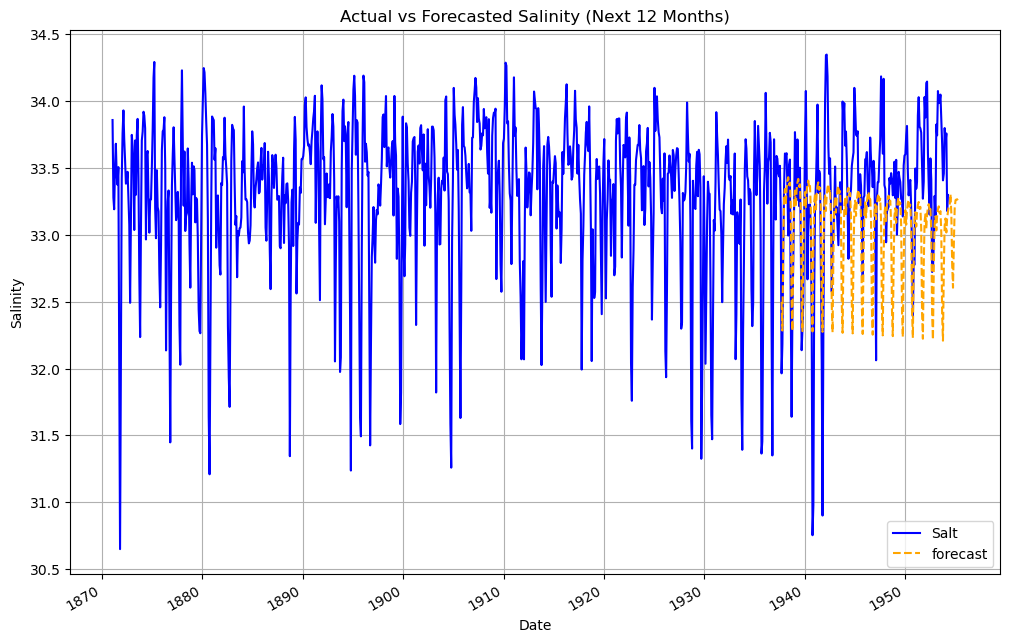

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ensure index is in datetime format
df.index = pd.to_datetime(df.index)

# Fit SARIMAX model
model = SARIMAX(df['Salt'], order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))
result = model.fit(disp=False)

# Generate future dates for the next 12 months
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1, 13)]
future_datest_df = pd.DataFrame(index=future_dates)

# Predict future values for the next 12 months
start = len(df)
end = len(df) + 11  # Predict next 12 months

future_predictions = result.predict(start=start, end=end, dynamic=True)

# Debugging: Print values to check
print("Future Predictions:\n", future_predictions)

# Add forecasted values to the future DataFrame
future_datest_df['forecast'] = future_predictions.values

# Combine with original data
future_df = pd.concat([df, future_datest_df])

# Plot actual and forecasted data
ax = future_df[['Salt']].plot(figsize=(12, 8), color="blue", label="Actual Salt")
future_df[['forecast']].plot(ax=ax, color="orange", label="Forecasted Salt", linestyle="dashed")

# Show the plot
plt.title("Actual vs Forecasted Salinity (Next 12 Months)")
plt.xlabel("Date")
plt.ylabel("Salinity")
plt.legend()
plt.grid()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_pre

Future Predictions:
 1000    33.340662
1001    33.465532
1002    33.534163
1003    33.318683
1004    32.894648
1005    32.771770
1006    33.276148
1007    33.602270
1008    33.642147
1009    33.610868
1010    33.539322
1011    33.511497
1012    33.445301
1013    33.509433
1014    33.531514
1015    33.282560
1016    32.801202
1017    32.690356
1018    33.259434
1019    33.579041
1020    33.639871
1021    33.591090
1022    33.598902
1023    33.547120
1024    33.463508
1025    33.517810
1026    33.532393
1027    33.278063
1028    32.787593
1029    32.678615
1030    33.257897
1031    33.576462
1032    33.640595
1033    33.589044
1034    33.609392
1035    33.553823
1036    33.467458
1037    33.520207
1038    33.533605
1039    33.278424
1040    32.786515
1041    32.677832
1042    33.258726
1043    33.577126
1044    33.641782
1045    33.589792
1046    33.612122
1047    33.555954
1048    33.469154
1049    33.521657
1050    33.534868
1051    33.279553
1052    32.787416
1053    32.678780
1054   

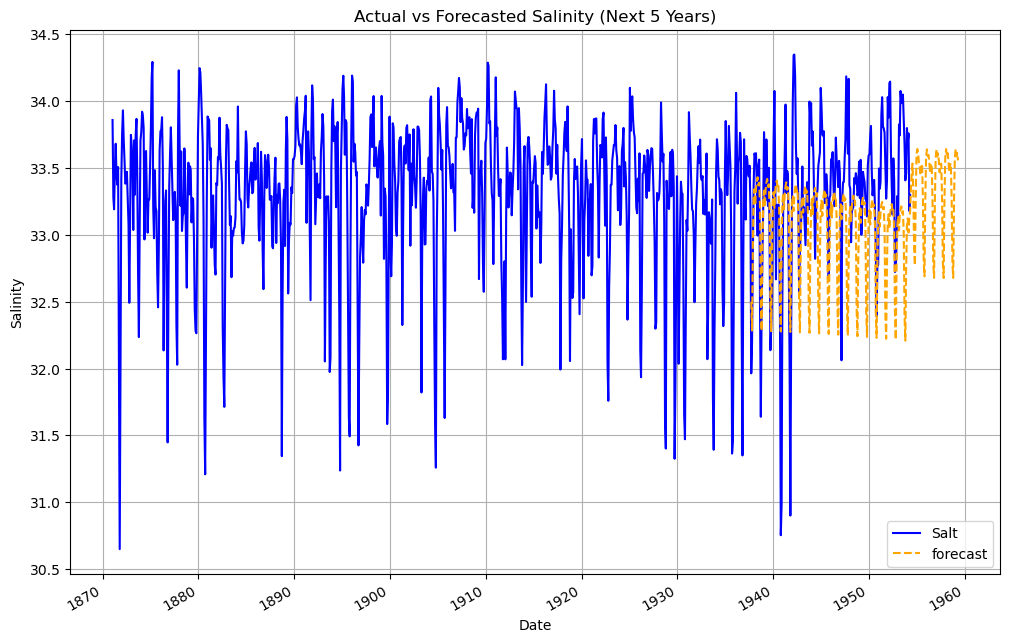

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ensure index is in datetime format
df.index = pd.to_datetime(df.index)

# Fit SARIMAX model
model = SARIMAX(df['Salt'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
result = model.fit(disp=False)

# Generate future dates for the next 5 years (60 months)
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1, 61)]
future_datest_df = pd.DataFrame(index=future_dates)

# Predict future values for the next 5 years
start = len(df)
end = len(df) + 59  # Predict next 60 months

future_predictions = result.predict(start=start, end=end)

# Debugging: Print values to check
print("Future Predictions:\n", future_predictions)

# Add forecasted values to the future DataFrame
future_datest_df['forecast'] = future_predictions.values

# Combine with original data
future_df = pd.concat([df, future_datest_df])

# Plot actual and forecasted data
ax = future_df[['Salt']].plot(figsize=(12, 8), color="blue", label="Actual Salt")
future_df[['forecast']].plot(ax=ax, color="orange", label="Forecasted Salt", linestyle="dashed")

# Show the plot
plt.title("Actual vs Forecasted Salinity (Next 5 Years)")
plt.xlabel("Date")
plt.ylabel("Salinity")
plt.legend()
plt.grid()
plt.show()


In [17]:
import time
# Start time
start_time_sarima = time.time()

# Fit SARIMAX model
model = SARIMAX(df['Salt'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
result = model.fit(disp=False)

# Predict future values for the next 5 years
future_predictions = result.predict(start=len(df), end=len(df) + 59)

# End time
end_time_sarima = time.time()

# Compute time taken
sarima_time = end_time_sarima - start_time_sarima
print(f"SARIMA Computation Time: {sarima_time:.4f} seconds")


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA Computation Time: 2.3560 seconds


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import numpy as np# Get in-sample predictions
train_pred_sarima = result.fittedvalues

# Compute accuracy metrics
mae_sarima = mean_absolute_error(df['Salt'].dropna(), train_pred_sarima)
rmse_sarima = np.sqrt(mean_squared_error(df['Salt'].dropna(), train_pred_sarima))
r2_sarima = r2_score(df['Salt'].dropna(),train_pred_sarima)
print(f"SARIMA MAE: {mae_sarima:.4f}")
print(f"SARIMA RMSE: {rmse_sarima:.4f}")
print(f"SARIMA R2: {r2_sarima:.4f}")


SARIMA MAE: 0.3311
SARIMA RMSE: 1.2525
SARIMA R2: -3.9655
